In [1]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from pathlib import Path
import numpy as np

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
def carregar_dados():
    # Caminho para os arquivos de dados
    caminho_producao = r"C:\Users\lucas\Downloads\dados_producao.csv"
    caminho_exportacao = r"C:\Users\lucas\Downloads\dados_exportacao.csv"

    # Carregar os dados de produção e exportação
    dados_producao = pd.read_csv(caminho_producao)
    dados_exportacao = pd.read_csv(caminho_exportacao)

    # Mostrar as 10 primeiras linhas de cada DataFrame
    print("Dados de Produção (Top 10):")
    print(dados_producao.head(10))
    
    print("\nDados de Exportação (Top 10):")
    print(dados_exportacao.head(10))

    return dados_producao, dados_exportacao




In [3]:
# Função para preparar os dados de produção para o Prophet
def preparar_dados_producao(dados_producao):
    # Aqui, selecionamos as colunas de interesse para o modelo (Ano e Quantidade)
    df_producao = dados_producao[['ano', 'total_litros']].rename(columns={'ano': 'ds', 'total_litros': 'y'})

    return df_producao

In [4]:
def preparar_dados_exportacao(dados_exportacao):
    # Selecionando as colunas de interesse para o modelo de exportação
    df_exportacao = dados_exportacao[['ano', 'quantidade_kg']].rename(columns={'ano': 'ds', 'quantidade_kg': 'y'})
    return df_exportacao


In [5]:
def treinar_modelo(df):
    # Definindo os dados de treino e teste
    treino = df[:-10]  # Usando os últimos 10 registros para teste
    teste = df[-10:]   # Os últimos 10 registros como teste

    # Treinando o modelo (por exemplo, um modelo de previsão com Prophet)
    modelo = Prophet()
    modelo.fit(treino)

    # Fazendo previsões
    futuro = modelo.make_future_dataframe(periods=len(teste), freq='Y')
    previsoes = modelo.predict(futuro)

    return modelo, previsoes, treino, teste





In [6]:
# Função para calcular as métricas de avaliação
def calcular_metricas(teste, previsoes):
    # Selecionando apenas os valores de interesse do período de teste
    y_true = teste['y'].values
    y_pred = previsoes['yhat'][-len(teste):].values

    # Cálculo das métricas
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)

    return mae, rmse, mape

In [7]:
def calcular_metricas(teste, previsoes):
    # Obtenha os valores reais e as previsões
    y_true = teste['y'].values
    y_pred = previsoes['yhat'][-len(teste):].values

    # Verifique se há zeros em y_true
    if np.any(y_true == 0):
        print("Atenção: y_true contém zeros. Isso pode afetar o cálculo do MAPE.")

    # Cálculo das métricas
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # Calcule o MAPE apenas se não houver zeros
    if np.any(y_true == 0):
        mape = np.inf  # Definindo como infinito se houver zeros
    else:
        mape = mean_absolute_percentage_error(y_true, y_pred)

    return mae, rmse, mape



In [8]:
# Função principal
def main():
    dados_producao, dados_exportacao = carregar_dados()
    
    # Preparar os dados
    df_producao = preparar_dados_producao(dados_producao)
    df_exportacao = preparar_dados_exportacao(dados_exportacao)

    # Treinar o modelo de produção
    modelo_producao, previsoes_producao, treino_producao, teste_producao = treinar_modelo(df_producao)

    # Calcular as métricas para o modelo de produção
    mae_producao, rmse_producao, mape_producao = calcular_metricas(teste_producao, previsoes_producao)

    # Exibir as métricas do modelo de produção
    print("Métricas de avaliação do modelo de Produção:")
    print(f"MAE: {mae_producao:.2f}")
    print(f"RMSE: {rmse_producao:.2f}")
    print(f"MAPE: {mape_producao * 100:.2f}%")
    
    # Repetir o processo para o modelo de exportação

if __name__ == "__main__":
    main()


20:05:34 - cmdstanpy - INFO - Chain [1] start processing


Dados de Produção (Top 10):
                produto   ano  total_litros
0             Licorosos  1970      282500.0
1         Mosto simples  1970     7170736.0
2             Bagaceira  1970      961290.0
3             Destilado  1970      830030.0
4         Borra líquida  1970     3847673.0
5  Suco de uva integral  1970     1097771.0
6                Rosado  1970    42981052.0
7                 Tinto  1970   181815609.0
8                Branco  1970    16311289.0
9              Mistelas  1970     1072100.0

Dados de Exportação (Top 10):
                  pais   ano  quantidade_kg    valor
0  Antilhas Holandesas  1970          280.0    207.0
1       Estados Unidos  1970        11200.0   4200.0
2               Guiana  1970          114.0     36.0
3             Tanzânia  1970        13692.0   3562.0
4              Libéria  1970         4160.0   1190.0
5              Bolívia  1970         2548.0    699.0
6            Outros(1)  1970         5132.0   3208.0
7             Paraguai  1970     

20:05:34 - cmdstanpy - INFO - Chain [1] done processing


Métricas de avaliação do modelo de Produção:
MAE: 36798722.83
RMSE: 48503391.95
MAPE: 614773.86%


c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


In [9]:
# Carregar o arquivo de produção (substitua pelo caminho do seu arquivo
df_producao = pd.read_csv(r'C:\Users\lucas\Downloads\dados_producao.csv', sep=',')

# Exibir as primeiras linhas do DataFrame
print(df_producao.head())


         produto   ano  total_litros
0      Licorosos  1970      282500.0
1  Mosto simples  1970     7170736.0
2      Bagaceira  1970      961290.0
3      Destilado  1970      830030.0
4  Borra líquida  1970     3847673.0


Index(['produto', 'ano', 'total_litros'], dtype='object')


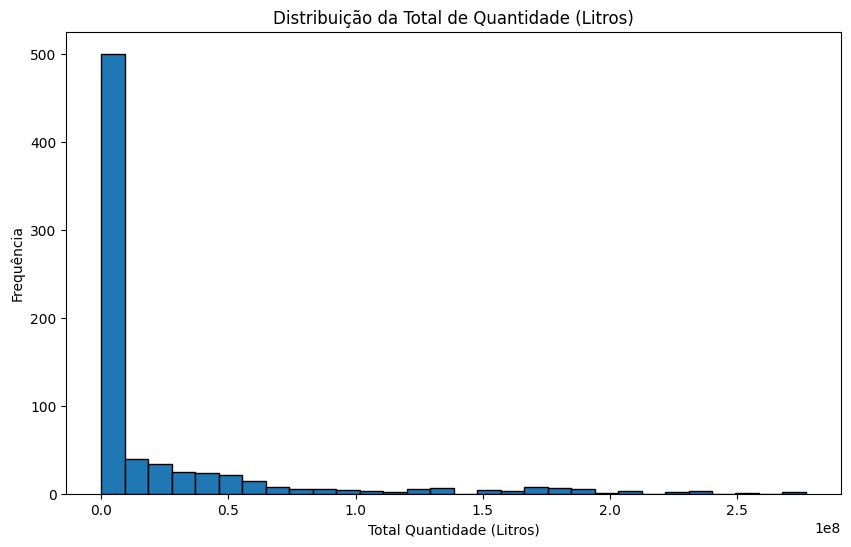

In [10]:
# Exibir os nomes das colunas
print(df_producao.columns)

# Visualize os dados para verificar a distribuição
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_producao['total_litros'], bins=30, edgecolor='black')
plt.title('Distribuição da Total de Quantidade (Litros)')
plt.xlabel('Total Quantidade (Litros)')
plt.ylabel('Frequência')
plt.show()

In [11]:
# Verificando dados faltantes
print(df_producao.isnull().sum())

# Verificando valores extremos
print(df_producao['total_litros'].describe())


produto         0
ano             0
total_litros    0
dtype: int64
count    7.340000e+02
mean     2.281215e+07
std      4.756546e+07
min      1.000000e+02
25%      7.195750e+04
50%      1.184336e+06
75%      2.205182e+07
max      2.772346e+08
Name: total_litros, dtype: float64


In [12]:
# Visualizando os produtos com os maiores totais de litros
df_extremos = df_producao[df_producao['total_litros'] > 1e7]  # Filtrando os maiores
print(df_extremos.sort_values(by='total_litros', ascending=False))


                     produto   ano  total_litros
348                    Tinto  2004   277234607.0
400                    Tinto  2008   268640960.0
390                    Tinto  2007   252942291.0
563                   Branco  2017   239456385.0
125                    Tinto  1985   236080369.0
..                       ...   ...           ...
276            Mosto simples  1998    11046570.0
238            Mosto simples  1994    10972700.0
119            Mosto simples  1985    10637557.0
262  Suco de uva concentrado  1997    10524045.0
394     Suco de uva integral  2007    10147037.0

[230 rows x 3 columns]


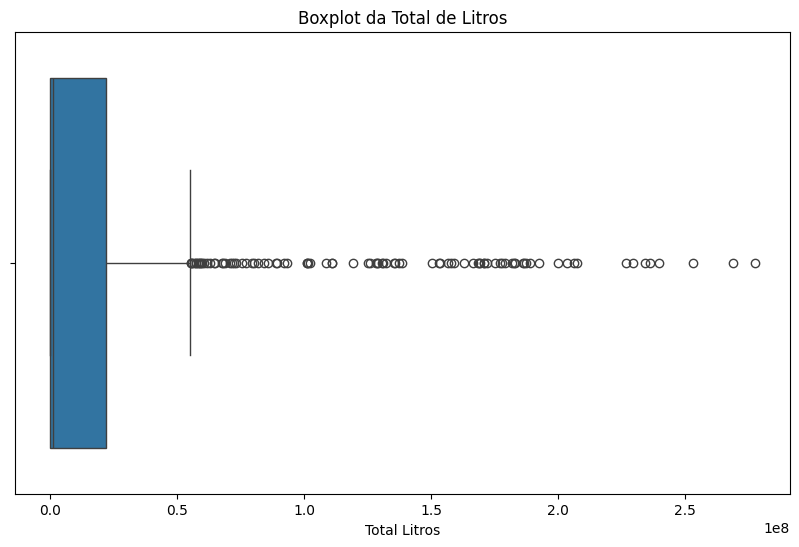

In [13]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_producao['total_litros'])
plt.title('Boxplot da Total de Litros')
plt.xlabel('Total Litros')
plt.show()


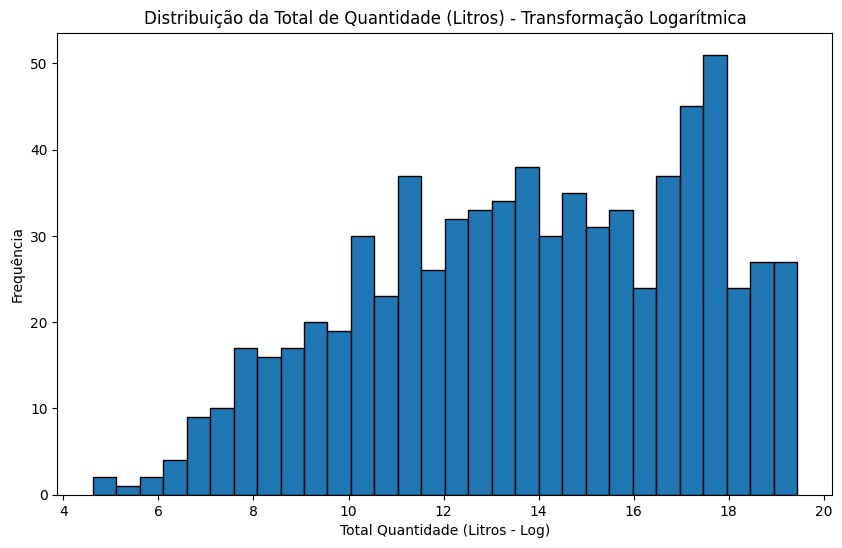

In [14]:
# Aplicando a transformação logarítmica novamente, se desejado
df_producao['total_litros_log'] = np.log1p(df_producao['total_litros'])

# Visualizando a nova distribuição
plt.figure(figsize=(10, 6))
plt.hist(df_producao['total_litros_log'], bins=30, edgecolor='black')
plt.title('Distribuição da Total de Quantidade (Litros) - Transformação Logarítmica')
plt.xlabel('Total Quantidade (Litros - Log)')
plt.ylabel('Frequência')
plt.show()


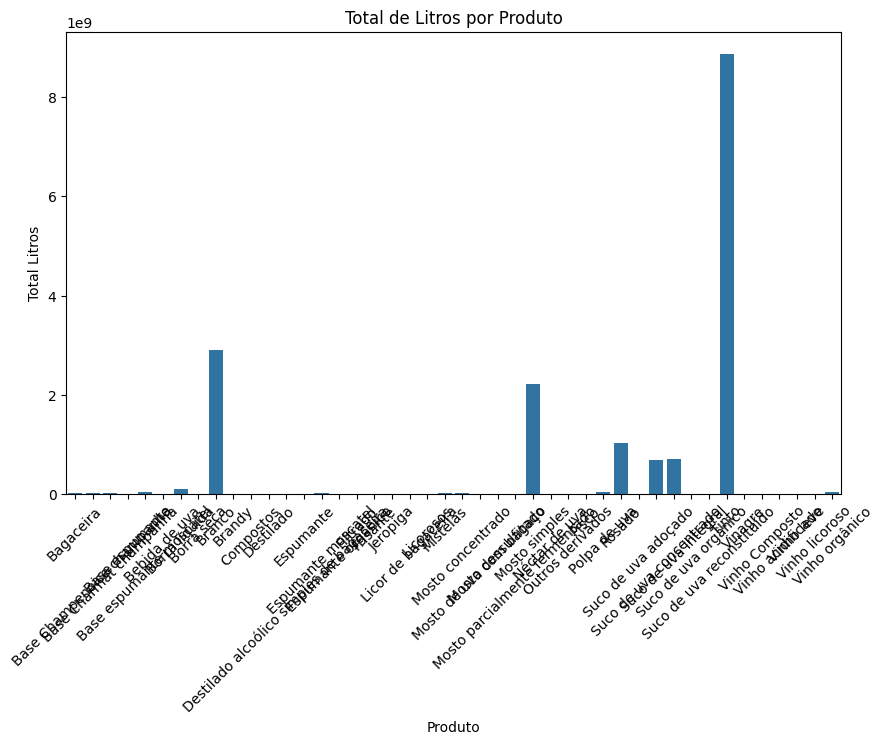

In [15]:
# Agrupando por produto e somando total_litros
df_agrupado = df_producao.groupby('produto')['total_litros'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='produto', y='total_litros', data=df_agrupado)
plt.title('Total de Litros por Produto')
plt.xlabel('Produto')
plt.ylabel('Total Litros')
plt.xticks(rotation=45)
plt.show()


In [16]:
# Definindo o limite superior dos outliers (1.5x o intervalo interquartil)
Q1 = df_producao['total_litros'].quantile(0.25)
Q3 = df_producao['total_litros'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

# Identificando os outliers
outliers = df_producao[df_producao['total_litros'] > limite_superior]
print(outliers)


           produto   ano  total_litros  total_litros_log
7            Tinto  1970   181815609.0         19.018504
10           Tinto  1971   128399035.0         18.670653
24           Tinto  1972   124963763.0         18.643534
35           Tinto  1973    92008644.0         18.337393
47           Tinto  1974   156592142.0         18.869155
..             ...   ...           ...               ...
664  Mosto simples  2021   153579926.0         18.849732
686          Tinto  2022   187262132.0         19.048020
688  Mosto simples  2022   126048241.0         18.652175
716          Tinto  2023   162936667.0         18.908872
729  Mosto simples  2023   157848983.0         18.877149

[92 rows x 4 columns]


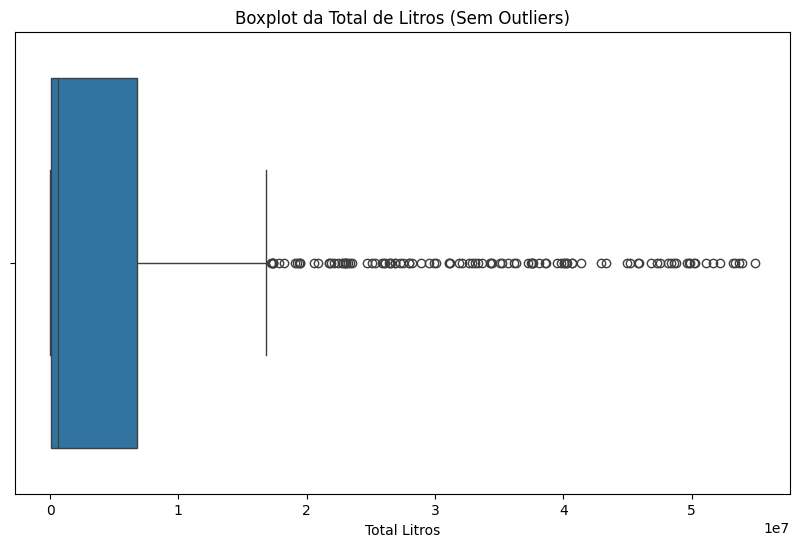

In [17]:
# Remover outliers
df_sem_outliers = df_producao[df_producao['total_litros'] <= limite_superior]

# Visualizar a distribuição sem outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_sem_outliers['total_litros'])
plt.title('Boxplot da Total de Litros (Sem Outliers)')
plt.xlabel('Total Litros')
plt.show()


In [18]:
# Agrupando por produto para investigar a soma de total_litros
df_agrupado_produto = df_producao.groupby('produto')['total_litros'].sum().reset_index()
df_agrupado_produto = df_agrupado_produto.sort_values(by='total_litros', ascending=False)
print(df_agrupado_produto)


                                     produto  total_litros
37                                     Tinto  8.876746e+09
8                                     Branco  2.904682e+09
26                             Mosto simples  2.224380e+09
31                                    Rosado  1.034988e+09
34                      Suco de uva integral  7.084320e+08
33                   Suco de uva concentrado  6.862077e+08
6                              Borra líquida  9.392630e+07
4                    Base espumante moscatel  4.145462e+07
43                            Vinho orgânico  4.022438e+07
30                              Polpa de uva  3.317849e+07
2                     Base Charmat champanha  2.013054e+07
0                                  Bagaceira  8.672865e+06
14                        Espumante moscatel  7.625544e+06
1                 Base Champenoise champanha  7.431405e+06
22                         Mosto concentrado  7.199297e+06
21                                  Mistelas  6.638710e+

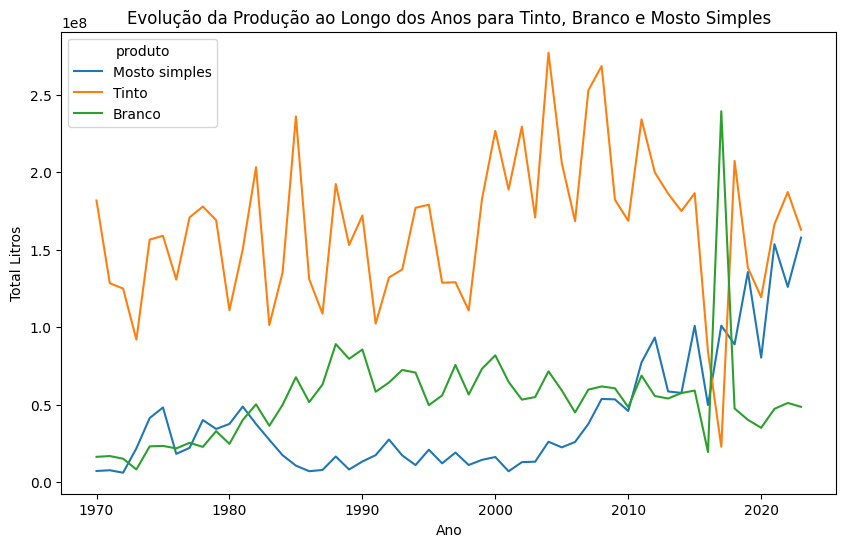

In [19]:
# Analisando a produção ao longo dos anos para os principais produtos
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_producao[df_producao['produto'].isin(['Tinto', 'Branco', 'Mosto simples'])], 
             x='ano', y='total_litros', hue='produto')
plt.title('Evolução da Produção ao Longo dos Anos para Tinto, Branco e Mosto Simples')
plt.xlabel('Ano')
plt.ylabel('Total Litros')
plt.show()
